The vanishing gradients problem is one example of unstable behavior that you may encounter when training a deep neural network.

It describes the situation where a deep multilayer feed-forward network or a recurrent neural network is unable to propagate useful gradient information from the output end of the model back to the layers near the input end of the model.

The result is the general inability of models with many layers to learn on a given dataset or to prematurely converge to a poor solution.

Many fixes and workarounds have been proposed and investigated, such as alternate weight initialization schemes, unsupervised pre-training, layer-wise training, and variations on gradient descent. Perhaps the most common change is the use of the rectified linear activation function that has become the new default, instead of the hyperbolic tangent activation function that was the default through the late 1990s and 2000s.

In this tutorial, you will discover how to diagnose a vanishing gradient problem when training a neural network model and how to fix it using an alternate activation function and weight initialization scheme.

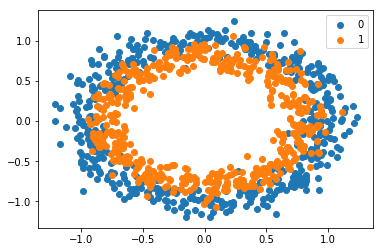

In [34]:

# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()


In [35]:
from sklearn.preprocessing import MinMaxScaler 
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [36]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

In [38]:
from keras.optimizers import SGD
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [39]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [40]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [41]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.804, Test: 0.814


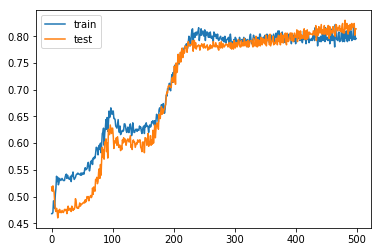

In [42]:
from matplotlib import pyplot

# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Running the example fits the model in just a few seconds.

The model performance on the train and test sets is calculated and displayed. Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times.

We can see that in this case, the model learned the problem well, achieving an accuracy of about 81.6% on both the train and test datasets.

A line plot of model accuracy on the train and test sets is created, showing the change in performance over all 500 training epochs.

The plot suggests, for this run, that the performance begins to slow around epoch 300 at about 80% accuracy for both the train and test sets.

### Having many hidden layer

Traditionally, developing deep Multilayer Perceptron models was challenging.

Deep models using the hyperbolic tangent activation function do not train easily, and much of this poor performance is blamed on the vanishing gradient problem.

We can attempt to investigate this using the MLP model developed in the previous section.

The number of hidden layers can be increased from 1 to 5; for example:

Train: 0.668, Test: 0.656


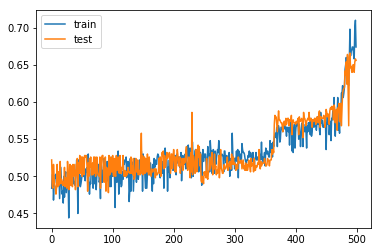

In [45]:
# deeper mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## Deeper MLP Model with ReLU for Two Circles Problem

The rectified linear activation function has supplanted the hyperbolic tangent activation function as the new preferred default when developing Multilayer Perceptron networks, as well as other network types like CNNs.

This is because the activation function looks and acts like a linear function, making it easier to train and less likely to saturate, but is, in fact, a nonlinear function, forcing negative inputs to the value 0. It is claimed as one possible approach to addressing the vanishing gradients problem when training deeper models.

When using the rectified linear activation function (or ReLU for short), it is good practice to use the He weight initialization scheme. We can define the MLP with five hidden layers using ReLU and He initialization, listed below.

Train: 0.806, Test: 0.826


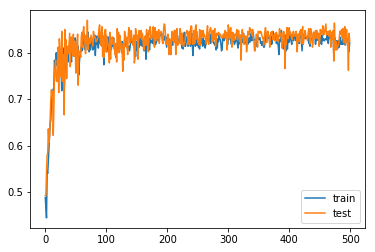

In [46]:
# deeper mlp with relu for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times.

In this case, we can see that this small change has allowed the model to learn the problem, achieving about 84% accuracy on both datasets, outperforming the single layer model using the tanh activation function.

Train:  0.806, Test: 0.826


Use of the ReLU activation function has allowed us to fit a much deeper model for this simple problem, but this capability does not extend infinitely. For example, increasing the number of layers results in slower learning to a point at about 20 layers where the model is no longer capable of learning the problem, at least with the chosen configuration.

For example, below is a line plot of train and test accuracy of the same model with 15 hidden layers that shows that it is still capable of learning the problem.

Credits to machinelearningmastery -> Jason Brownlee (PhD)